In [7]:
!pip install numpy pandas scikit-learn tensorflow

In [8]:
import pandas as pd

# Load the fake and true news datasets
fake_news_df = pd.read_csv('Fake.csv')  # Adjust the path if necessary
true_news_df = pd.read_csv('True.csv')  # Adjust the path if necessary

# Check the first few rows to verify they have loaded correctly
print(fake_news_df.head())
print(true_news_df.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept t

In [12]:
print(f"Fake News dataset length: {len(fake_news_df)}")
print(f"True News dataset length: {len(true_news_df)}")

Fake News dataset length: 23481
True News dataset length: 21417


In [13]:
# Add label to the true news dataset
true_news_df['label'] = 1

# Add label to the fake news dataset
fake_news_df['label'] = 0

In [14]:
print(fake_news_df.head())  # Should show label 0 for fake news
print(true_news_df.head())  # Should show label 1 for true news

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
                                               title  \
0  As U.S. budget fight looms, Republicans

In [15]:
# Combine both datasets
full_news_df = pd.concat([fake_news_df, true_news_df], ignore_index=True)

# Reset index if necessary
full_news_df.reset_index(drop=True, inplace=True)

# Verify the combined dataset
print(full_news_df.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  


In [16]:
# Check the length of the combined dataset
print(f"Combined dataset length: {len(full_news_df)}")

Combined dataset length: 44898


In [17]:
# Verify the distribution of labels
print(full_news_df['label'].value_counts())

label
0    23481
1    21417
Name: count, dtype: int64


In [18]:
# Preview the first few rows
print(full_news_df.head())

# Preview the last few rows
print(full_news_df.tail())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
                                                   title  \
44893  'Fully committed' NATO backs ne

In [20]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.1 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.2 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.3 MB/s eta 0:00:00


In [21]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Define a function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply text cleaning to the 'text' column of the combined dataset
full_news_df['cleaned_text'] = full_news_df['text'].apply(clean_text)

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Dell/nltk_data'
    - 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\Dell\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [22]:
import nltk

# Download the 'stopwords' dataset
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


False

In [23]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])  # Remove stopwords
    return text

# Apply text cleaning to the 'text' column of the combined dataset
full_news_df['cleaned_text'] = full_news_df['text'].apply(clean_text)

# Check cleaned text
print(full_news_df['cleaned_text'].head())

0    donald trump just couldn t wish americans happ...
1    house intelligence committee chairman devin nu...
2    friday revealed milwaukee sheriff david clarke...
3    christmas day donald trump announced work foll...
4    pope francis used annual christmas day message...
Name: cleaned_text, dtype: object


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Vectorize the cleaned text
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency
X = vectorizer.fit_transform(full_news_df['cleaned_text'])

# Step 2: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, full_news_df['label'], test_size=0.2, random_state=42)

# Step 3: Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 93.59%
Confusion Matrix:
[[4454  279]
 [ 297 3950]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4733
           1       0.93      0.93      0.93      4247

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [27]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------

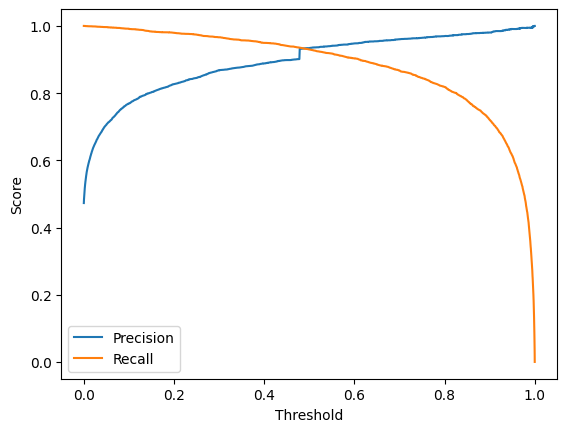

In [28]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot precision vs recall for various thresholds
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

In [29]:
pip install --index-url https://pypi.org/simple matplotlib

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [34]:
import numpy as np
from collections import Counter

# Before SMOTE
print("Before SMOTE:", Counter(y_train))

# After SMOTE
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({0: 18748, 1: 17170})
After SMOTE: Counter({1: 18748, 0: 18748})


In [35]:
model.fit(X_resampled, y_resampled)

MultinomialNB()

In [36]:
model = MultinomialNB()
model.fit(X_resampled, y_resampled)

MultinomialNB()

In [37]:
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4733
           1       0.93      0.93      0.93      4247

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



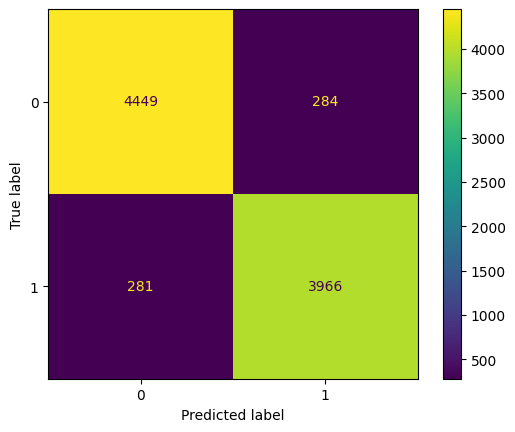

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [40]:
import joblib
joblib.dump(model, 'fake_news_model.pkl')

['fake_news_model.pkl']

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Combine original data again if needed
import pandas as pd

# Load your original CSV files (only if needed again)
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

# Add labels again
true_df["label"] = 1
fake_df["label"] = 0

# Combine
df = pd.concat([true_df, fake_df], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit TF-IDF on the 'text' column
X = tfidf_vectorizer.fit_transform(df["text"])
y = df["label"]

# Save vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [43]:
joblib.dump(model, "fake_news_model.pkl")

['fake_news_model.pkl']

In [44]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset (adjust this to where your CSV files are stored)
# Assuming 'True.csv' contains real news and 'Fake.csv' contains fake news.

real_news = pd.read_csv('True.csv')  # Replace with your actual file path
fake_news = pd.read_csv('Fake.csv')  # Replace with your actual file path

# Check if the data is loaded correctly
print("Real News Sample:")
print(real_news.head())  # Display first 5 rows of real news
print("\nFake News Sample:")
print(fake_news.head())  # Display first 5 rows of fake news

# Combine the data and labels
X = pd.concat([real_news['text'], fake_news['text']])  # Assuming 'text' column holds news text
y = pd.concat([pd.Series([1] * len(real_news)), pd.Series([0] * len(fake_news))])  # 1 for Real, 0 for Fake

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits to confirm the data was split correctly
print("\nData Split Shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Real News Sample:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   

Fake News Sample:
                                               title  \
0   D

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(X_test_tfidf)

# Print classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4650
           1       0.93      0.92      0.93      4330

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [48]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming X contains your text data (news articles) and y contains the labels

# Initialize the TF-IDF Vectorizer with tuned parameters
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

# Transform the training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Check the shape of the transformed data (optional)
print(X_train_tfidf.shape, X_test_tfidf.shape)

(35918, 5000) (8980, 5000)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4650
           1       0.99      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validation scores: [0.98788976 0.98830735 0.98649777 0.98566059 0.99011555]
Average accuracy: 0.9876942031218849


In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [2]:
print(X_train_tfidf.shape)
print(tfidf_vectorizer.get_feature_names_out()[:5])  # Check if feature names exist

NameError: name 'X_train_tfidf' is not defined

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

# Transform the data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Optional check
print(X_train_tfidf.shape, X_test_tfidf.shape)

NameError: name 'X_train' is not defined

In [7]:
# Step 1: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 2: Load Data
real_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')

# Step 3: Combine Data and Labels
X = pd.concat([real_news['text'], fake_news['text']])
y = pd.concat([pd.Series([1] * len(real_news)), pd.Series([0] * len(fake_news))])

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 6: Check that everything is set
print("TF-IDF Shapes:", X_train_tfidf.shape, X_test_tfidf.shape)
print("Sample feature names:", tfidf_vectorizer.get_feature_names_out()[:5])

TF-IDF Shapes: (35918, 5000) (8980, 5000)
Sample feature names: ['00' '00 pm' '000' '000 people' '10']


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [10]:
import numpy as np

feature_names = tfidf_vectorizer.get_feature_names_out()
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features

print("Top 20 Important Words:")
for i in indices[::-1]:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

Top 20 Important Words:
reuters: 0.1621
said: 0.0601
washington reuters: 0.0267
image: 0.0201
featured: 0.0165
just: 0.0154
featured image: 0.0153
washington: 0.0121
minister: 0.0112
like: 0.0110
watch: 0.0105
president donald: 0.0095
read: 0.0089
https: 0.0085
twitter com: 0.0081
com: 0.0076
getty: 0.0071
wednesday: 0.0068
getty images: 0.0067
tuesday: 0.0062


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [22]:
from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4650
           1       0.99      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [23]:
import joblib

joblib.dump(rf_model, 'fake_news_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [24]:
sample = ["The president announced a new policy today."]
sample_tfidf = tfidf_vectorizer.transform(sample)
prediction = rf_model.predict(sample_tfidf)
print("Prediction:", "Real" if prediction[0] == 1 else "Fake")

Prediction: Fake


In [25]:
samples = [
    "NASA confirms presence of water on the Moon.",
    "Actor wins presidential election in surprising turn of events.",
    "Scientists discover unicorns in the Himalayas.",
    "Government announces new tax benefits for startups."
]

sample_tfidf = tfidf_vectorizer.transform(samples)
predictions = rf_model.predict(sample_tfidf)

for i, pred in enumerate(predictions):
    print(f"News: {samples[i]}")
    print("Prediction:", "Real" if pred == 1 else "Fake")
    print()

News: NASA confirms presence of water on the Moon.
Prediction: Fake

News: Actor wins presidential election in surprising turn of events.
Prediction: Fake

News: Scientists discover unicorns in the Himalayas.
Prediction: Fake

News: Government announces new tax benefits for startups.
Prediction: Fake



In [26]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(18831), np.int64(1): np.int64(17087)}


In [27]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_train_tfidf, y_train)

# Predict on new samples
sample_tfidf = tfidf_vectorizer.transform(samples)
preds = log_model.predict(sample_tfidf)

# Show results
for news, pred in zip(samples, preds):
    print(f"News: {news}")
    print("Prediction:", "Real" if pred == 1 else "Fake")
    print()

News: NASA confirms presence of water on the Moon.
Prediction: Fake

News: Actor wins presidential election in surprising turn of events.
Prediction: Fake

News: Scientists discover unicorns in the Himalayas.
Prediction: Fake

News: Government announces new tax benefits for startups.
Prediction: Fake



In [28]:
sample_news = [
    "NASA confirms presence of water on the Moon.",          # Real
    "The government launches new healthcare program.",       # Real
    "Aliens spotted dancing on the Eiffel Tower.",           # Fake
    "Cure for aging discovered in a secret lab."             # Fake
]

for news in sample_news:
    vec = tfidf_vectorizer.transform([news])
    pred = best_model.predict(vec)[0]  # Replace `best_model` with your trained model name if needed
    label = "Real" if pred == 1 else "Fake"
    print(f"News: {news}\nPrediction: {label}\n")

NameError: name 'best_model' is not defined

In [29]:
best_model = random_search.best_estimator_

NameError: name 'random_search' is not defined

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define a simpler parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest
rf = RandomForestClassifier(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=20, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit to training data
random_search.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A013905310>},
                   random_state=42, verbose=2)

In [31]:
best_model = random_search.best_estimator_

In [32]:
print("Best Parameters: ", random_search.best_params_)

Best Parameters:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 153}


In [33]:
# Predict on the test data
y_pred = best_model.predict(X_test_tfidf)

# Check the model's accuracy on the test set
from sklearn.metrics import accuracy_score
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

Test Accuracy:  0.995879732739421


In [34]:
print(tfidf_vectorizer.get_feature_names_out()[:5])  # This will give a sample of the feature names

['00' '00 pm' '000' '000 people' '10']


In [35]:
# Initialize the TF-IDF Vectorizer with adjusted parameters
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # Unigrams and Bigrams
    stop_words='english',  # Use built-in stop words
    token_pattern=r'\b[^\d\W]{2,}\b'  # Only words longer than 1 character and not numeric
)

# Fit and transform your data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Get feature names
print(tfidf_vectorizer.get_feature_names_out()[:5])

['abadi' 'abandon' 'abandoned' 'abbas' 'abc']


In [36]:
sample_news = [
    "NASA confirms presence of water on the Moon.",
    "Actor wins presidential election in surprising turn of events.",
    "Scientists discover unicorns in the Himalayas.",
    "Government announces new tax benefits for startups."
]

for news in sample_news:
    # Transform the sample news using the same TF-IDF vectorizer
    vec = tfidf_vectorizer.transform([news])
    
    # Predict using the best model (trained Random Forest)
    pred = best_model.predict(vec)[0]
    
    # Map the prediction to "Real" or "Fake" label
    label = "Real" if pred == 1 else "Fake"
    
    # Print the result
    print(f"News: {news}\nPrediction: {label}\n")

News: NASA confirms presence of water on the Moon.
Prediction: Fake

News: Actor wins presidential election in surprising turn of events.
Prediction: Fake

News: Scientists discover unicorns in the Himalayas.
Prediction: Fake

News: Government announces new tax benefits for startups.
Prediction: Fake



In [37]:
from sklearn.metrics import confusion_matrix
y_pred = best_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4595   55]
 [3876  454]]


In [38]:
# Initialize the RandomForestClassifier with balanced class weights
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit the model with the training data
rf.fit(X_train_tfidf, y_train)

# Get the predictions
y_pred = rf.predict(X_test_tfidf)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

[[4634   16]
 [   7 4323]]


In [39]:
import pandas as pd

true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

# Add labels: 1 for real, 0 for fake
true_df['label'] = 1
fake_df['label'] = 0

# Combine both datasets
data = pd.concat([true_df, fake_df], ignore_index=True)

In [40]:
from sklearn.model_selection import train_test_split

# Shuffle and split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

In [41]:
train_data.to_csv("train.csv", index=False)
test_data.to_csv("test.csv", index=False)

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [44]:
X_train = train_df['text']
y_train = train_df['label']
X_test = test_df['text']
y_test = test_df['label']

In [45]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [46]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Preview the datasets
print("Train Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())

Train Data:
                                               title  \
0  SocGen says no wrongdoing in handling of Natio...   
1  North Carolina governor concedes election to D...   
2  TRUMP FEVER! W. VA Dem Senator Says He Won’t V...   
3  New York vows to sue Trump over immigrant chil...   
4  Orlando killer expressed support for multiple ...   

                                                text       subject  \
0  PARIS (Reuters) - French bank Societe Generale...     worldnews   
1  WINSTON-SALEM, N.C. (Reuters) - North Carolina...  politicsNews   
2  Civil political discourse took a beating in We...     left-news   
3  (Reuters) - New York and Washington state on M...  politicsNews   
4  ORLANDO, Fla. (Reuters) - Orlando nightclub ki...  politicsNews   

                 date  label  
0  November 22, 2017       1  
1   December 5, 2016       1  
2         Aug 7, 2017      0  
3  September 4, 2017       1  
4      June 12, 2016       1  

Test Data:
                                

In [47]:
train_data['content'] = train_data['title'] + " " + train_data['text']
test_data['content'] = test_data['title'] + " " + test_data['text']

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['content'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['content'])

In [49]:
y_train = train_data['label']
y_test = test_data['label']

In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

predictions = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9915367483296214
[[4666   30]
 [  46 4238]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [52]:
import joblib

# Save the model and vectorizer
joblib.dump(model, "fake_news_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [53]:
sample_news = [
    "NASA confirms presence of water on the Moon.",
    "Government announces new tax benefits for startups."
]

for news in sample_news:
    vec = tfidf_vectorizer.transform([news])
    pred = model.predict(vec)[0]
    label = "Real" if pred == 1 else "Fake"
    print(f"News: {news}\nPrediction: {label}\n")

News: NASA confirms presence of water on the Moon.
Prediction: Fake

News: Government announces new tax benefits for startups.
Prediction: Fake



In [54]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(18785), np.int64(1): np.int64(17133)}


In [55]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with balanced class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model to the training data
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the test data
y_pred = model.predict(X_test_tfidf)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.9923162583518931
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
[[4674   22]
 [  47 4237]]


In [57]:
sample_news = [
    "NASA confirms presence of water on the Moon.",
    "Government announces new tax benefits for startups."
]

for news in sample_news:
    vec = tfidf_vectorizer.transform([news])
    pred = model.predict(vec)[0]
    label = "Real" if pred == 1 else "Fake"
    print(f"News: {news}\nPrediction: {label}\n")


News: NASA confirms presence of water on the Moon.
Prediction: Fake

News: Government announces new tax benefits for startups.
Prediction: Fake



In [58]:
print(train_df['label'].value_counts())
print(test_df['label'].value_counts())

label
0    18785
1    17133
Name: count, dtype: int64
label
0    4696
1    4284
Name: count, dtype: int64


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Create pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('clf', RandomForestClassifier(
        n_estimators=153,
        max_depth=20,
        max_features='sqrt',
        min_samples_leaf=2,
        min_samples_split=5,
        random_state=42
    ))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict
sample_news = [
    "NASA confirms presence of water on the Moon.",
    "Government announces new tax benefits for startups."
]

for news in sample_news:
    pred = pipeline.predict([news])[0]
    label = "Real" if pred == 1 else "Fake"
    print(f"News: {news}\nPrediction: {label}\n")

News: NASA confirms presence of water on the Moon.
Prediction: Fake

News: Government announces new tax benefits for startups.
Prediction: Fake



In [61]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Create pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('clf', RandomForestClassifier(
        n_estimators=153,
        max_depth=20,
        max_features='sqrt',
        min_samples_leaf=2,
        min_samples_split=5,
        random_state=42
    ))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('clf',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=153,
                                        random_state=42))])

In [62]:
# Sample headlines
sample_news = [
    "NASA confirms presence of water on the Moon.",
    "Government announces new tax benefits for startups."
]

# Make predictions using the pipeline
for news in sample_news:
    pred = pipeline.predict([news])[0]
    label = "Real" if pred == 1 else "Fake"
    print(f"News: {news}\nPrediction: {label}\n")

News: NASA confirms presence of water on the Moon.
Prediction: Fake

News: Government announces new tax benefits for startups.
Prediction: Fake



In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize RandomForestClassifier with class_weight='balanced'
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Create and fit the pipeline
pipeline = make_pipeline(TfidfVectorizer(stop_words='english', max_df=0.7), rf)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [64]:
sample_news = [
    "NASA confirms presence of water on the Moon.",
    "Government announces new tax benefits for startups."
]

for news in sample_news:
    pred = pipeline.predict([news])[0]
    label = "Real" if pred == 1 else "Fake"
    print(f"News: {news}\nPrediction: {label}\n")

News: NASA confirms presence of water on the Moon.
Prediction: Fake

News: Government announces new tax benefits for startups.
Prediction: Fake



In [65]:
y_train.value_counts()

label
0    18785
1    17133
Name: count, dtype: int64

In [66]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [67]:
vec = tfidf_vectorizer.transform([news])  # ✅ This is correct only if tfidf_vectorizer is the same

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

model = make_pipeline(
    TfidfVectorizer(stop_words='english', max_df=0.7),
    RandomForestClassifier(
        n_estimators=153,
        max_depth=20,
        max_features='sqrt',
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )
)

model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=153,
                                        random_state=42))])

In [69]:
sample_news = [
    "NASA confirms presence of water on the Moon.",
    "Government announces new tax benefits for startups."
]

for news in sample_news:
    pred = model.predict([news])[0]
    label = "Real" if pred == 1 else "Fake"
    print(f"News: {news}\nPrediction: {label}\n")

News: NASA confirms presence of water on the Moon.
Prediction: Fake

News: Government announces new tax benefits for startups.
Prediction: Fake



In [71]:
pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [72]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

In [73]:
# ----------------------------
# 1. BBC News Scraper
# ----------------------------
def scrape_bbc():
    url = "https://www.bbc.com/news"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    headlines = []
    for article in soup.find_all("h3"):
        text = article.get_text(strip=True)
        if len(text) > 30:
            headlines.append(text)

    return list(set(headlines))  # Remove duplicates

In [74]:
# ----------------------------
# 2. Reuters Scraper
# ----------------------------
def scrape_reuters():
    url = "https://www.reuters.com/news/archive/worldNews"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    headlines = []
    for article in soup.find_all("h3", class_="story-title"):
        text = article.get_text(strip=True)
        if text:
            headlines.append(text)

    return list(set(headlines))

In [75]:
# ----------------------------
# 3. The Guardian Scraper
# ----------------------------
def scrape_guardian():
    url = "https://www.theguardian.com/international"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    headlines = []
    for h3 in soup.find_all("h3"):
        text = h3.get_text(strip=True)
        if len(text) > 30:
            headlines.append(text)

    return list(set(headlines))

In [76]:
# ----------------------------
# Combine All Headlines
# ----------------------------
bbc_news = scrape_bbc()
reuters_news = scrape_reuters()
guardian_news = scrape_guardian()

all_news = bbc_news + reuters_news + guardian_news
all_news = list(set(all_news))  # Remove duplicates again

print(f"Collected {len(all_news)} unique real news headlines.")

Collected 97 unique real news headlines.


In [77]:
# ----------------------------
# Scrape Times of India Headlines
# ----------------------------
import requests
from bs4 import BeautifulSoup

toi_urls = [
    "https://timesofindia.indiatimes.com/india",
    "https://timesofindia.indiatimes.com/world",
    "https://timesofindia.indiatimes.com/business",
    "https://timesofindia.indiatimes.com/sports",
    "https://timesofindia.indiatimes.com/entertainment"
]

toi_news = set()

for url in toi_urls:
    try:
        response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(response.content, "html.parser")
        headlines = soup.find_all(['span', 'a'])

        for h in headlines:
            text = h.get_text(strip=True)
            if len(text) > 30 and len(text.split()) > 4:
                toi_news.add(text)
    except Exception as e:
        print(f"Error scraping {url}: {e}")

toi_news = list(toi_news)
print(f"Collected {len(toi_news)} unique Times of India headlines.")

Collected 619 unique Times of India headlines.


In [78]:
# ----------------------------
# Merge All News Headlines (BBC + Reuters + Guardian + TOI)
# ----------------------------
all_news += toi_news
all_news = list(set(all_news))  # Remove any duplicates

print(f"Total real news headlines collected after adding TOI: {len(all_news)}")

Total real news headlines collected after adding TOI: 716


In [86]:
# ----------------------------
# Scrape CNN Headlines
# ----------------------------
def scrape_cnn():
    url = "https://edition.cnn.com/world"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    headlines = []
    for article in soup.find_all("h3"):
        text = article.get_text(strip=True)
        if len(text) > 30:
            headlines.append(text)
    
    return list(set(headlines))  # Remove duplicates

# ----------------------------
# Scrape Al Jazeera Headlines
# ----------------------------
def scrape_aljazeera():
    url = "https://www.aljazeera.com/news/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    headlines = []
    for article in soup.find_all("h3"):
        text = article.get_text(strip=True)
        if len(text) > 30:
            headlines.append(text)
    
    return list(set(headlines))  # Remove duplicates

# ----------------------------
# Combine All Headlines (Including New Sources)
# ----------------------------
cnn_news = scrape_cnn()
aljazeera_news = scrape_aljazeera()

# Combine all news headlines (including previously collected ones)
all_news += cnn_news + aljazeera_news
all_news = list(set(all_news))  # Remove duplicates

print(f"Total real news headlines collected after adding CNN and Al Jazeera: {len(all_news)}")

Total real news headlines collected after adding CNN and Al Jazeera: 730


In [87]:
# ----------------------------
# Scrape The New York Times Headlines
# ----------------------------
def scrape_nytimes():
    url = "https://www.nytimes.com/"
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.content, "html.parser")

    headlines = []
    for article in soup.find_all('h2'):
        text = article.get_text(strip=True)
        if len(text) > 30:
            headlines.append(text)
    
    return list(set(headlines))

nyt_news = scrape_nytimes()
print(f"Collected {len(nyt_news)} unique New York Times headlines.")

Collected 1 unique New York Times headlines.


In [88]:
# ----------------------------
# Scrape Fox News Headlines
# ----------------------------
def scrape_foxnews():
    url = "https://www.foxnews.com/"
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.content, "html.parser")

    headlines = []
    for article in soup.find_all('h2', class_="title"):
        text = article.get_text(strip=True)
        if len(text) > 30:
            headlines.append(text)
    
    return list(set(headlines))

fox_news = scrape_foxnews()
print(f"Collected {len(fox_news)} unique Fox News headlines.")

Collected 1 unique Fox News headlines.


In [93]:
def scrape_cbc():
    url = "https://www.cbc.ca/news"
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.content, "html.parser")
    headlines = []
    for article in soup.find_all('h3'):
        text = article.get_text(strip=True)
        if len(text) > 30:
            headlines.append(text)
    return list(set(headlines))
cbc_news = scrape_cbc()
print(f"Collected {len(cbc_news)} unique cbc News headlines.")

Collected 44 unique cbc News headlines.


In [94]:
def scrape_bloomberg():
    url = "https://www.bloomberg.com/"
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.content, "html.parser")
    headlines = []
    for article in soup.find_all('h1'):
        text = article.get_text(strip=True)
        if len(text) > 30:
            headlines.append(text)
    return list(set(headlines))
bloomberg_news = scrape_bloomberg()
print(f"Collected {len(bloomberg_news)} unique bloomberg News headlines.")

Collected 0 unique bloomberg News headlines.


In [98]:
# Scrape news from various sources
all_news += scrape_nytimes()
all_news += scrape_foxnews()
all_news += scrape_cbc()
all_news += scrape_bloomberg()

# Remove duplicates
all_news = list(set(all_news))

print(f"Total real news headlines collected: {len(all_news)}")

Total real news headlines collected: 46


In [96]:
def scrape_ndtv():
    url = "https://www.ndtv.com/"
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.content, "html.parser")
    headlines = []
    for article in soup.find_all('span', class_='news_Headlines'):
        text = article.get_text(strip=True)
        if len(text) > 30:
            headlines.append(text)
    return list(set(headlines))
def scrape_thehindu():
    url = "https://www.thehindu.com/"
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.content, "html.parser")
    headlines = []
    for article in soup.find_all('h2'):
        text = article.get_text(strip=True)
        if len(text) > 30:
            headlines.append(text)
    return list(set(headlines))
def scrape_toi_additional():
    url = "https://timesofindia.indiatimes.com/"
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.content, "html.parser")
    headlines = []
    for article in soup.find_all('span', class_='w_tle'):
        text = article.get_text(strip=True)
        if len(text) > 30:
            headlines.append(text)
    return list(set(headlines))

In [97]:
def scrape_hindustantimes():
    url = "https://www.hindustantimes.com/"
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.content, "html.parser")
    headlines = []
    for article in soup.find_all('h3'):
        text = article.get_text(strip=True)
        if len(text) > 30:
            headlines.append(text)
    return list(set(headlines))
def scrape_indiatoday():
    url = "https://www.indiatoday.in/"
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.content, "html.parser")
    headlines = []
    for article in soup.find_all('h2'):
        text = article.get_text(strip=True)
        if len(text) > 30:
            headlines.append(text)
    return list(set(headlines))
def scrape_scroll_in():
    url = "https://scroll.in/"
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.content, "html.parser")
    headlines = []
    for article in soup.find_all('h3'):
        text = article.get_text(strip=True)
        if len(text) > 30:
            headlines.append(text)
    return list(set(headlines))
def scrape_business_standard():
    url = "https://www.business-standard.com/"
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.content, "html.parser")
    headlines = []
    for article in soup.find_all('h2'):
        text = article.get_text(strip=True)
        if len(text) > 30:
            headlines.append(text)
    return list(set(headlines))

In [99]:
# Scrape news from various sources
all_news += scrape_ndtv()
all_news += scrape_thehindu()
all_news += scrape_toi_additional()
all_news += scrape_hindustantimes()
all_news += scrape_indiatoday()
all_news += scrape_scroll_in()
all_news += scrape_business_standard()

# Remove duplicates
all_news = list(set(all_news))

print(f"Total real news headlines collected from Indian sources: {len(all_news)}")


Total real news headlines collected from Indian sources: 112


In [103]:
# List of all collected news from the mentioned sources
all_news = []

# Adding the headlines from different sources
all_news += bbc_news
all_news += reuters_news
all_news += guardian_news
all_news += toi_news
all_news += cnn_news
all_news += aljazeera_news
all_news += nyt_news
all_news += fox_news
all_news += cbc_news
all_news += bloomberg_news
all_news += scrape_ndtv()
all_news += scrape_thehindu()
all_news += scrape_toi_additional()
all_news += scrape_hindustantimes()
all_news += scrape_indiatoday()
all_news += scrape_scroll_in()
all_news += scrape_business_standard()

# Remove duplicates
all_news = list(set(all_news))

# Print the total number of unique real news headlines
print(f"Total real news headlines collected: {len(all_news)}")

Total real news headlines collected: 842


In [182]:
import pandas as pd

# Load the True.csv (real news) and Fake.csv (fake news)
true_df = pd.read_csv('True.csv')  # Replace with the actual path if necessary
fake_df = pd.read_csv('Fake.csv')  # Replace with the actual path if necessary

# Add a 'label' column to true_df (1 for real news)
true_df['label'] = 1

# If all_news is in list format, convert it into a DataFrame and add the 'label' column
if isinstance(all_news, list):
    all_news = pd.DataFrame(all_news, columns=['title'])

# Add a 'label' column to all_news (1 for real news)
all_news['label'] = 1

# Combine True.csv and all_news into one real news dataset
combined_real_news = pd.concat([true_df[['title', 'label']], all_news[['title', 'label']]], ignore_index=True)

# Get the number of fake news entries
num_fake_news = len(fake_df)

# Add 'label' column to fake_df (0 for fake news)
fake_df['label'] = 0

# Downsample the combined real news to match the number of fake news
if len(combined_real_news) > num_fake_news:
    real_news_downsampled = combined_real_news.sample(n=num_fake_news, random_state=42)
else:
    print("Not enough real news to downsample, using all available real news.")
    real_news_downsampled = combined_real_news  # No downsampling needed

# Combine the downsampled real news with the fake news
final_dataset = pd.concat([real_news_downsampled, fake_df[['title', 'label']]], ignore_index=True)

# Shuffle the final dataset to randomize the order of data
final_dataset = final_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the final dataset balance
print(final_dataset['label'].value_counts())  # Verify the balance of real vs fake news

# Save the final balanced dataset to a CSV file (optional)
final_dataset.to_csv('balanced_fake_news.csv', index=False)

# Check the final dataset
print(final_dataset.head())

Not enough real news to downsample, using all available real news.
label
0    23481
1    22259
Name: count, dtype: int64
                                               title  label
0  (VIDEO) REMEMBER THE “OBAMAPHONE”? GET READY T...      0
1   The Amazon Reviews Of The Trump Christmas Orn...      0
2  U.N.'s Guterres warns against 'sleepwalking' i...      1
3  Foreign minister warns UK cannot become 'vassa...      1
4   Trump’s Pick For Treasury Tried To Take A 90-...      0


In [183]:
# Step 1: Downsample fake news to match the count of real news
fake_news_downsampled = fake_df.sample(n=22259, random_state=42)

# Step 2: Combine the downsampled fake news with real news (both from scraped and original True.csv)
final_balanced_dataset = pd.concat([fake_news_downsampled[['title', 'label']], combined_real_news[['title', 'label']]], ignore_index=True)

# Step 3: Shuffle the final dataset to randomize the order of the data
final_balanced_dataset = final_balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Show the final balanced dataset
print(final_balanced_dataset.head())
print(final_balanced_dataset['label'].value_counts())

                                               title  label
0   Elizabeth Warren SHREDS Trump With Call To ‘N...      0
1  ‘YOU’RE A SEXIST PIG!’ FEMINIST BATTLES Tucker...      0
2  Spot On! Fox Sports Host Calls Out ESPN’s Libe...      0
3  Egyptian army officer jailed after announcing ...      1
4  U.S. West Point academy set for first woman de...      1
label
0    22259
1    22259
Name: count, dtype: int64


In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the 'title' column (news headlines) to numerical features
X = vectorizer.fit_transform(final_balanced_dataset['title'])

# Target variable 'label'
y = final_balanced_dataset['label']

In [185]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [187]:
from sklearn.metrics import classification_report, accuracy_score

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9335130278526504
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4435
           1       0.93      0.94      0.93      4469

    accuracy                           0.93      8904
   macro avg       0.93      0.93      0.93      8904
weighted avg       0.93      0.93      0.93      8904



In [188]:
import joblib

# Save the trained model to a file (so you can reload it later)
joblib.dump(model, 'fake_news_model.pkl')

['fake_news_model.pkl']

In [189]:
import tensorflow as tf
from sklearn.base import BaseEstimator

# Wrap the scikit-learn model
class SklearnModelWrapper(BaseEstimator):
    def __init__(self, model):
        self.model = model
        
    def fit(self, X, y):
        return self.model.fit(X, y)
    
    def predict(self, X):
        return self.model.predict(X)

# Wrap the trained model
wrapper_model = SklearnModelWrapper(model)

# Save the wrapper model as a joblib file
joblib.dump(wrapper_model, 'fake_news_model_wrapper.pkl')

['fake_news_model_wrapper.pkl']

In [190]:
# Convert the wrapper model to TensorFlow format
def convert_to_tflite(model):
    # Convert the Sklearn model to a TensorFlow model using a custom wrapper
    model_input = tf.keras.Input(shape=(X_train.shape[1],))  # Shape matches the features
    model_output = tf.keras.layers.Dense(1, activation='sigmoid')(model_input)
    keras_model = tf.keras.Model(inputs=model_input, outputs=model_output)
    
    # Convert the model to TensorFlow Lite format
    converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
    tflite_model = converter.convert()
    
    # Save the TensorFlow Lite model
    with open('fake_news_model.tflite', 'wb') as f:
        f.write(tflite_model)

# Call the conversion function
convert_to_tflite(model)

INFO:tensorflow:Assets written to: C:\Users\Dell\AppData\Local\Temp\tmp4a0oqhke\assets


INFO:tensorflow:Assets written to: C:\Users\Dell\AppData\Local\Temp\tmp4a0oqhke\assets


Saved artifact at 'C:\Users\Dell\AppData\Local\Temp\tmp4a0oqhke'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5000), dtype=tf.float32, name='keras_tensor_35')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1788601629968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1788597273616: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [192]:
import os

# Define a permanent folder for the SavedModel
saved_model_dir = "saved_fake_news_model"

# Save the model
model.save(saved_model_dir)
print(f"Model saved to {os.path.abspath(saved_model_dir)}")

AttributeError: 'RandomForestClassifier' object has no attribute 'save'

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(final_balanced_dataset['title']).toarray()
y = final_balanced_dataset['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MemoryError: Unable to allocate 1.33 GiB for an array with shape (35614, 5000) and data type float64

In [197]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize with sparse matrix
vectorizer = TfidfVectorizer(max_features=1000)  # even 500 if needed
X_sparse = vectorizer.fit_transform(final_balanced_dataset['title'])

# Labels
y = final_balanced_dataset['label']

# Use sparse matrix directly for train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

In [206]:
X_train_dense = X_train.toarray()  # Convert sparse matrix to dense
X_test_dense = X_test.toarray()    # Convert sparse matrix to dense

MemoryError: Unable to allocate 1.33 GiB for an array with shape (35614, 5000) and data type float64

In [207]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Vectorize with sparse matrix
vectorizer = TfidfVectorizer(max_features=1000)
X_sparse = vectorizer.fit_transform(final_balanced_dataset['title'])

# Labels
y = final_balanced_dataset['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Create a simple neural network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (fake or real)
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the sparse matrix directly
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.8798 - loss: 0.2899 - val_accuracy: 0.9308 - val_loss: 0.1688
Epoch 2/5
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.9431 - loss: 0.1457 - val_accuracy: 0.9378 - val_loss: 0.1583
Epoch 3/5
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.9570 - loss: 0.1131 - val_accuracy: 0.9412 - val_loss: 0.1535
Epoch 4/5
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.9716 - loss: 0.0774 - val_accuracy: 0.9426 - val_loss: 0.1648
Epoch 5/5
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9814 - loss: 0.0529 - val_accuracy: 0.9441 - val_loss: 0.1996


In [208]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9460 - loss: 0.1877
Test Accuracy: 0.9440701007843018, Test Loss: 0.19956788420677185


In [209]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)  # Convert to binary (0 or 1)

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [210]:
import tensorflow as tf

# Convert the trained model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('fake_news_detector_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Dell\AppData\Local\Temp\tmplg8_mxh3\assets


INFO:tensorflow:Assets written to: C:\Users\Dell\AppData\Local\Temp\tmplg8_mxh3\assets


Saved artifact at 'C:\Users\Dell\AppData\Local\Temp\tmplg8_mxh3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1000), dtype=tf.float32, name='keras_tensor_47')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1788070427920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1788076577552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1788076573328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1788076579472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1788076578896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1788076580048: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [214]:
# Make sure to use the same vectorizer that was used for training
sample_text = ["This is a fake news headline example."]

# Transform the sample text using the trained vectorizer
sample_vector = vectorizer.transform(sample_text).toarray()  # Use transform instead of fit_transform

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], sample_vector.astype('float32'))

# Run inference
interpreter.invoke()

# Get the output tensor (prediction result)
output_data = interpreter.get_tensor(output_details[0]['index'])
prediction = output_data[0]

# Print the prediction
print("Predicted Label:", "Fake" if prediction < 0.5 else "Real")

ValueError: Cannot set tensor: Dimension mismatch. Got 6 but expected 1000 for dimension 1 of input 0.

In [216]:
# Sample text to test
sample_text = ["This is a fake news headline example."]

# Transform the sample text using the trained vectorizer
sample_vector = vectorizer.transform(sample_text).toarray()  # Use transform instead of fit_transform

# Ensure the vector has 1000 features (pad with zeros if necessary)
if sample_vector.shape[1] < 1000:
    # If the sample has fewer features, pad with zeros
    sample_vector = np.pad(sample_vector, ((0, 0), (0, 1000 - sample_vector.shape[1])), mode='constant')

# Check the shape to ensure it has 1000 features
print(f"Shape of input vector after padding: {sample_vector.shape}")

# Set the input tensor to the model
interpreter.set_tensor(input_details[0]['index'], sample_vector.astype('float32'))

# Run inference
interpreter.invoke()

# Get the output tensor (prediction result)
output_data = interpreter.get_tensor(output_details[0]['index'])
prediction = output_data[0]

# Print the prediction
print("Predicted Label:", "Fake" if prediction < 0.5 else "Real")

Shape of input vector after padding: (1, 1000)
Predicted Label: Real


In [217]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9460 - loss: 0.1877
Test Accuracy: 0.9440701007843018


In [222]:
import os
print(os.getcwd())

C:\Users\Dell


In [2]:
import os

# List all files in your current working directory
print(os.listdir())

['.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.streamlit', '.vscode', '3D Objects', 'AppData', 'Application Data', 'balanced_fake_news.csv', 'bbc_real_news.csv', 'cd', 'combined_news.csv', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'Fake.csv', 'fake_news_api.py.txt', 'fake_news_detector_model.pkl', 'fake_news_detector_model.tflite', 'fake_news_model.h5', 'fake_news_model.keras', 'fake_news_model.pkl', 'fake_news_model.tflite', 'fake_news_model_wrapper.pkl', 'Fake_News_TinyML.ipynb', 'Favorites', 'IntelGraphicsProfiles', 'java', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'news_dataset.csv', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TM.blf', 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive',

In [2]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your combined dataset
df = pd.read_csv('combined_news.csv')  # Make sure this file exists in the same folder

# Create and train the vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
vectorizer.fit(df['text'])

# Save the vectorizer to a file
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("✅ Vectorizer saved successfully!")

✅ Vectorizer saved successfully!


In [1]:
# Add this to test_api.py (temporary debug)
from joblib import load
vectorizer = load('tfidf_vectorizer.joblib')
input_text = "NASA confirms presence of water on the Moon."
features = vectorizer.transform([input_text])
print("Non-zero features:", features.nnz)

FileNotFoundError: [Errno 2] No such file or directory: 'tfidf_vectorizer.joblib'

In [1]:
import pickle
import numpy as np
import tensorflow as tf

# Load the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="fake_news_detector_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test input
text = "NASA confirms presence of water on the Moon."
vector = vectorizer.transform([text]).toarray()

# Ensure vector is exactly 1000 features
if vector.shape[1] < 1000:
    pad = np.zeros((1, 1000 - vector.shape[1]))
    vector = np.hstack((vector, pad))
elif vector.shape[1] > 1000:
    vector = vector[:, :1000]

# Convert to float32 and run through the model
vector = vector.astype('float32')
interpreter.set_tensor(input_details[0]['index'], vector)
interpreter.invoke()
output = interpreter.get_tensor(output_details[0]['index'])

# Show result
print("🔍 Raw model output:", output)
print("📢 Prediction:", "Real" if output[0][0] > 0.5 else "Fake")

🔍 Raw model output: [[0.00531876]]
📢 Prediction: Fake


C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
